In [23]:
from kubetools import get_all, delete, top
from subprocess import check_output
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [24]:
# Grab all pods + pod resources information, merge into one df
df_top = top('pod')
df_get = get_all('pod')
df = pd.merge(df_top, df_get, on='name', how='outer')

# Convert age to hours and sort
df['age'] /= 60.0
df = df.sort_values(['age', 'cpu'], ascending=False)

# Determine if this is a user/prod/etc pod
df['kind'] = df['name'].map(lambda a: a.split('-')[0])

df['restarts'] = pd.to_numeric(df['restarts'])

# Sandbox

In [19]:
df.groupby('node').count()['name']

node
gke-prod-a-ssd-pool-32-134a959a-p2kz     2
gke-prod-a-ssd-pool-32-134a959a-r77s    34
gke-prod-a-ssd-pool-32-134a959a-z4v2    31
Name: name, dtype: int64

In [22]:
df.sort_values('kind')

,name,cpu,memory,ready,status,restarts,age,ip,node,kind
3,binder-d9f95f6c9-jgp2d,28.0,0.168,1/1,Running,0,0.666667,10.12.13.7,gke-prod-a-ssd-pool-32-134a959a-r77s,binder
61,build-jupyterhub-2dzero-2dto-2djupyterhub-2dk8...,NaN,NaN,0/1,ContainerCreating,0,0.016667,<none>,gke-prod-a-ssd-pool-32-134a959a-z4v2,build
57,build-kevinheavey-2dbinder-5ftest-b8e0db-efbcd8,0.0,0.035,1/1,Running,0,0.116667,10.12.13.64,gke-prod-a-ssd-pool-32-134a959a-r77s,build
1,hub-66649ff699-cw7kh,54.0,0.139,1/1,Running,0,0.666667,10.12.13.13,gke-prod-a-ssd-pool-32-134a959a-r77s,hub
39,jupyter-jupyterlab-2djupyterlab-2ddemo-2d7zxvptjt,0.0,0.091,1/1,Running,0,0.183333,10.12.13.60,gke-prod-a-ssd-pool-32-134a959a-r77s,jupyter
4,jupyter-ipython-2dipython-2din-2ddepth-2dtnhhf5bx,17.0,0.135,1/1,Running,0,0.183333,10.12.12.58,gke-prod-a-ssd-pool-32-134a959a-z4v2,jupyter
17,jupyter-ipython-2dipython-2din-2ddepth-2dv2ayx222,2.0,0.388,1/1,Running,0,0.200000,10.12.13.58,gke-prod-a-ssd-pool-32-134a959a-r77s,jupyter
41,jupyter-ipython-2dipython-2din-2ddepth-2d6z0lldvc,0.0,0.128,1/1,Running,0,0.183333,10.12.12.59,gke-prod-a-ssd-pool-32-134a959a-z4v2,jupyter
24,jupyter-jupyterlab-2djupyterlab-2ddemo-2dq8tub7hp,1.0,0.132,1/1,Running,0,0.216667,10.12.12.57,gke-prod-a-ssd-pool-32-134a959a-z4v2,jupyter
14,jupyter-ipython-2dipython-2din-2ddepth-2dy6mz4621,3.0,0.105,1/1,Running,0,0.216667,10.12.13.54,gke-prod-a-ssd-pool-32-134a959a-r77s,jupyter


# Pod statuses

In [20]:
df.groupby('node').count()['name']

node
gke-prod-a-ssd-pool-32-134a959a-p2kz     2
gke-prod-a-ssd-pool-32-134a959a-r77s    34
gke-prod-a-ssd-pool-32-134a959a-z4v2    31
Name: name, dtype: int64

In [16]:
df.groupby(['status', 'node']).count()['name']

status             node                                
ContainerCreating  gke-prod-a-ssd-pool-32-134a959a-p2kz     1
Init:0/1           gke-prod-a-ssd-pool-32-134a959a-p2kz     1
PodInitializing    gke-prod-a-ssd-pool-32-134a959a-z4v2     2
Running            gke-prod-a-ssd-pool-32-134a959a-kx9k     2
                   gke-prod-a-ssd-pool-32-134a959a-r77s    37
                   gke-prod-a-ssd-pool-32-134a959a-z4v2    27
Name: name, dtype: int64

# Pod Resources

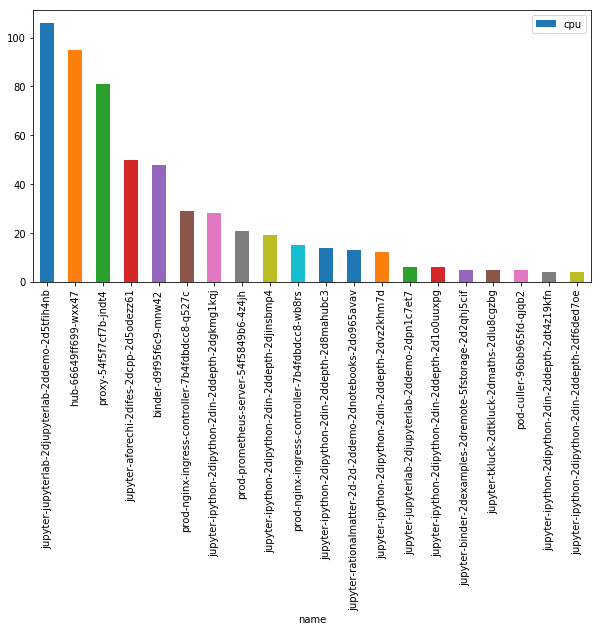

In [36]:
# CPU usage
df.sort_values('cpu', ascending=False).head(20).plot.bar(x='name', y='cpu', figsize=(10, 5))

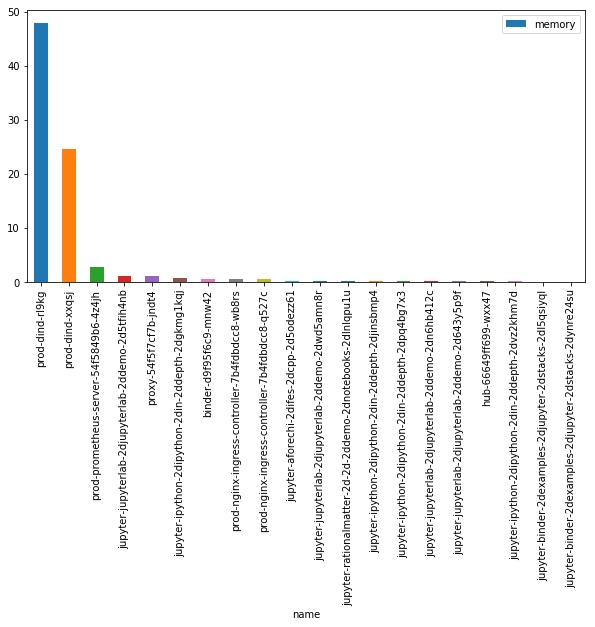

In [37]:
df.sort_values('memory', ascending=False).head(20).plot.bar(x='name', y='memory', figsize=(10, 5))

# Distribution of pod age

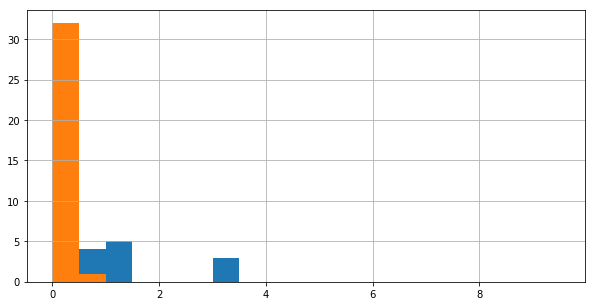

In [38]:
fig, ax = plt.subplots()
for node, vals in df.groupby('node'):
    vals.query('age < 10')['age'].hist(bins=np.arange(0, 10, .5), ax=ax, figsize=(10, 5))

# Deleting pods

In [25]:
# Set up and test query
delete_pods = df.query('node in ["gke-prod-a-ssd-pool-32-134a959a-kx9k", "gke-prod-a-ssd-pool-32-134a959a-p2kz"]')
print(len(delete_pods))
delete_pods

2


,name,cpu,memory,ready,status,restarts,age,ip,node,kind
63,prod-dind-f5jz8,NaN,NaN,0/1,Init:0/1,0,0.383333,<none>,gke-prod-a-ssd-pool-32-134a959a-p2kz,prod
64,prod-prometheus-node-exporter-hl2ht,NaN,NaN,0/1,ContainerCreating,0,0.383333,10.128.0.6,gke-prod-a-ssd-pool-32-134a959a-p2kz,prod


In [26]:
for nm in delete_pods['name'].values:
    delete(nm, force=True)

Deleted pod: prod-dind-f5jz8
Deleted pod: prod-prometheus-node-exporter-hl2ht
